In [ ]:
# Importieren von Standard-Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns
from sklearn.metrics import r2_score

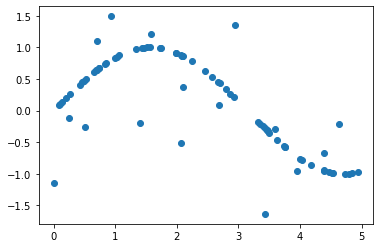

In [ ]:
# wir wollen eine Sinuskurve zu vorhersagen.
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Damit die Vorhersage nicht zu einfach wird, kommt rauschen dazu durch Anpassen einzelner Y-Werte
y[::5] += 3 * (0.5 - rng.rand(16))

plt.scatter(X, y)

# Lineare Regression

Bis zum Schluß haben wir den gleichen Aufbau: erst Modell trainieren, dann plotten

In [ ]:
from sklearn.linear_model import LinearRegression # importiere die Bibliothek für logistische Regression
linRegressor = LinearRegression() # keine spezifischen Parameter angegeben, d.h. nur Standardwerte
linRegressor.fit(X, y) # trainiere das Modell auf den Trainingsdaten
y_pred_lin_regression = linRegressor.predict(X) # und sage vorher....das wars schon!!

print("R2 Score von:", r2_score(y, y_pred_lin_regression))

R2 Score von: 0.4337222216968736


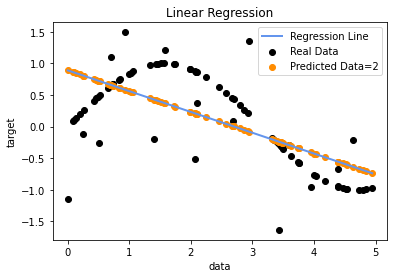

In [ ]:
plt.figure()

plt.scatter(X, y, color='black', label='Real Data')
plt.scatter(X, y_pred_lin_regression, color='darkorange', label='Predicted Data=2')
plt.plot(X, y_pred_lin_regression, color="cornflowerblue", label="Regression Line", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Naive Bayes

In [ ]:
from sklearn import linear_model

regBayes = linear_model.BayesianRidge()
regBayes.fit(X, y)
y_pred_BayesRegressor = regBayes.predict(X)

print("R2 Score von:", r2_score(y, y_pred_BayesRegressor))

R2 Score von: 0.43360376075298623


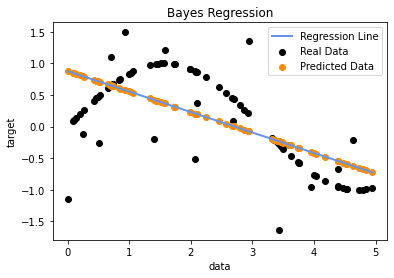

In [ ]:
plt.figure()
plt.scatter(X, y, color='black', label='Real Data')
plt.scatter(X, y_pred_BayesRegressor, color='darkorange', label='Predicted Data')
plt.plot(X, y_pred_BayesRegressor, color="cornflowerblue", label="Regression Line", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Bayes Regression")
plt.legend()
plt.show()

# K Nearest Neighbours

Hier bauen wir zum ersten Mal Hyperparameter-Optimierung ein. Das soll helfen, die Modellgenauigkeit zu verbessern.

Die [Doku](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) zeigt:
* n_neighbors: Number of neighbors to use by default for kneighbors queries.
* Uniform weights: uniform weights. All points in each neighborhood are weighted equally. 
* Distance weights: closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [ ]:
from sklearn import neighbors

# diese Schleife ermöglicht, für weights verschiedene Hyperparameter auszuprobieren
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights=weights)
    knn.fit(X, y)
    y_pred_KNN = knn.predict(X)
    print(f"R2 Score mit {weights} Gewichten: {r2_score(y, y_pred_KNN)}")

R2 Score mit uniform Gewichten: 0.8044298846141534
R2 Score mit distance Gewichten: 1.0


Wir sehen, daß für die Wahl von Distance Weight bessere Ergebnisse haben.

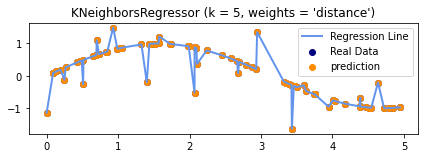

In [ ]:
plt.subplot(2, 1, i + 1)
plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_pred_KNN, color='darkorange', label='prediction')
plt.plot(X, y_pred_KNN, color="cornflowerblue", label="Regression Line", linewidth=2)
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

# Entscheidungsbaum

Wir probieren wieder Hyperparameter aus.

Wir trainieren einen Entscheidungsbaum mit einer maximalen Tiefe von 2 und einen mit einer maximalen Tiefe von 5.

Was macht dieser Parameter?
Laut [Doku](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Optimierung Hyperparameter.
TreeRegr = DecisionTreeRegressor(max_depth=2)
TreeRegr2 = DecisionTreeRegressor(max_depth=5)

TreeRegr.fit(X, y)
TreeRegr2.fit(X, y)

y_pred_tree = TreeRegr.predict(X)
y_pred_tree2 = TreeRegr2.predict(X)

print("Für Max_depth=2 gibts R2 Score von:", r2_score(y, y_pred_tree))
print("Für Max_depth=5 gibts R2 Score von:", r2_score(y, y_pred_tree2))

Für Max_depth=2 gibts R2 Score von: 0.7629899797432984
Für Max_depth=5 gibts R2 Score von: 0.9538725108408801


Der Entscheidungsbaum mit MaxDepth=5 hat eine deutlich bessere Genauigkeit.

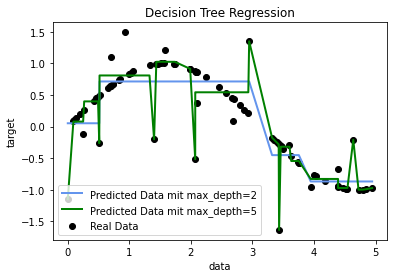

In [ ]:
plt.figure()

plt.scatter(X, y, color='black', label='Real Data')
plt.plot(X, y_pred_tree, color="cornflowerblue", label="Predicted Data mit max_depth=2", linewidth=2)
plt.plot(X, y_pred_tree2, color="green", label="Predicted Data mit max_depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Support Vector Regressor

In [ ]:
from sklearn import svm

SVR_basis = svm.SVR()
SVR_basis.fit(X, y)
y_pred_SVM_basis = SVR_basis.predict(X)
print("R2 Score von:", r2_score(y, y_pred_SVM_basis))

R2 Score von: 0.7700033840714311


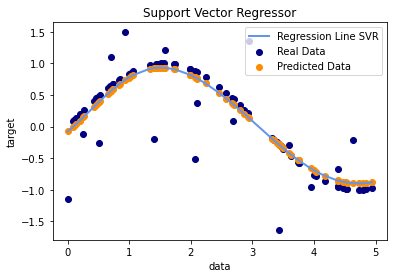

In [ ]:
plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_pred_SVM_basis, color='darkorange', label='Predicted Data')
plt.plot(X, y_pred_SVM_basis, color="cornflowerblue", label="Regression Line SVR", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regressor")
plt.legend()
plt.show()

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFRegressor = RandomForestRegressor(max_depth=5, random_state=0)
RFRegressor.fit(X, y)
y_RFRegressor_predicted = RFRegressor.predict(X)

print("R2 Score von:", r2_score(y, y_RFRegressor_predicted))

R2 Score von: 0.917361746237579


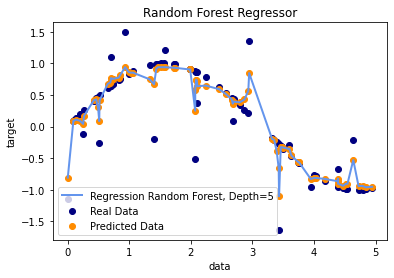

In [ ]:
plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_RFRegressor_predicted, color='darkorange', label='Predicted Data')
plt.plot(X, y_RFRegressor_predicted, color="cornflowerblue", label="Regression Random Forest, Depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regressor")
plt.legend()
plt.show()

# XGBoost

In [ ]:
import xgboost

XGB_Regressor = xgboost.XGBRegressor(max_depth=5)
XGB_Regressor.fit(X, y)
y_XGB_Regr = XGB_Regressor.predict(X)

print("R2 Score von:", r2_score(y, y_XGB_Regr))

[17:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score von: 0.9965790115785026


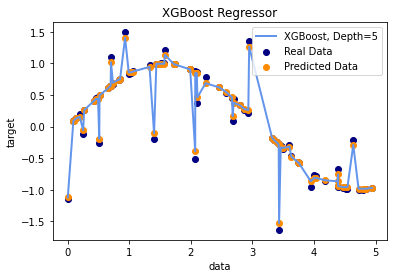

In [ ]:
plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_XGB_Regr, color='darkorange', label='Predicted Data')
plt.plot(X, y_XGB_Regr, color="cornflowerblue", label="XGBoost, Depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("XGBoost Regressor")
plt.legend()
plt.show()